In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("general_data.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4382.0,36.933364,9.137272,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4382.0,9.198996,8.105396,1.0,2.00,7.0,14.00,29.0
Education,4382.0,2.912369,1.024728,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4382.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4382.0,2207.804884,1271.688783,1.0,1108.25,2208.5,3308.75,4409.0
JobLevel,4382.0,2.063898,1.106115,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4382.0,65061.702419,47142.310175,10090.0,29110.00,49190.0,83790.00,199990.0
NumCompaniesWorked,4382.0,2.693291,2.497832,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4382.0,15.210634,3.663007,11.0,12.00,14.0,18.00,25.0
StandardHours,4382.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [6]:
df = df.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'],axis=1)

In [7]:
Label_E = LabelEncoder()

In [8]:
df.BusinessTravel = Label_E.fit_transform(df.BusinessTravel)
df.Department = Label_E.fit_transform(df.Department)
df.EducationField = Label_E.fit_transform(df.EducationField)
df.Gender = Label_E.fit_transform(df.Gender)
df.JobRole = Label_E.fit_transform(df.JobRole)
df.MaritalStatus = Label_E.fit_transform(df.MaritalStatus)

In [9]:
x = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 10)

In [11]:
RandomForrest = RandomForestClassifier(n_estimators=1000, oob_score=True, max_features=2)
RandomForrest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
for feature,imp in zip(x_train.columns,RandomForrest.feature_importances_):
    print(f"{feature}  {imp}")

Age  0.09810640179124934
BusinessTravel  0.027730361928833245
Department  0.0251608778020816
DistanceFromHome  0.06854015688070011
Education  0.04028466745386242
EducationField  0.03999207813279119
Gender  0.018342263020230332
JobLevel  0.03709822357742956
JobRole  0.05621291436980093
MaritalStatus  0.03664382476769969
MonthlyIncome  0.09591457018583728
NumCompaniesWorked  0.056533409482562434
PercentSalaryHike  0.06497924985909917
StockOptionLevel  0.033012131708164624
TotalWorkingYears  0.08693658507027714
TrainingTimesLastYear  0.044067448965878435
YearsAtCompany  0.07006280129290554
YearsSinceLastPromotion  0.043641256190994626
YearsWithCurrManager  0.05674077751960231


In [13]:
features = []
for feature,imp in zip(x_train.columns,RandomForrest.feature_importances_):
    if imp >= 0.04:
        features.append(feature)

In [14]:
features

['Age',
 'DistanceFromHome',
 'Education',
 'JobRole',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [15]:
x = df[features]

In [16]:
tree_model = DecisionTreeClassifier(random_state=10)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 10)

In [18]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [19]:
tree_model.score(x_train, y_train)

1.0

In [20]:
print("The accuracy on test data is: ", tree_model.score(x_test, y_test))

The accuracy on test data is:  0.9942987457240593


In [21]:
with open("Attrition_tree.dot",'w') as f:
    f = export_graphviz(tree_model, feature_names=features, out_file=f)

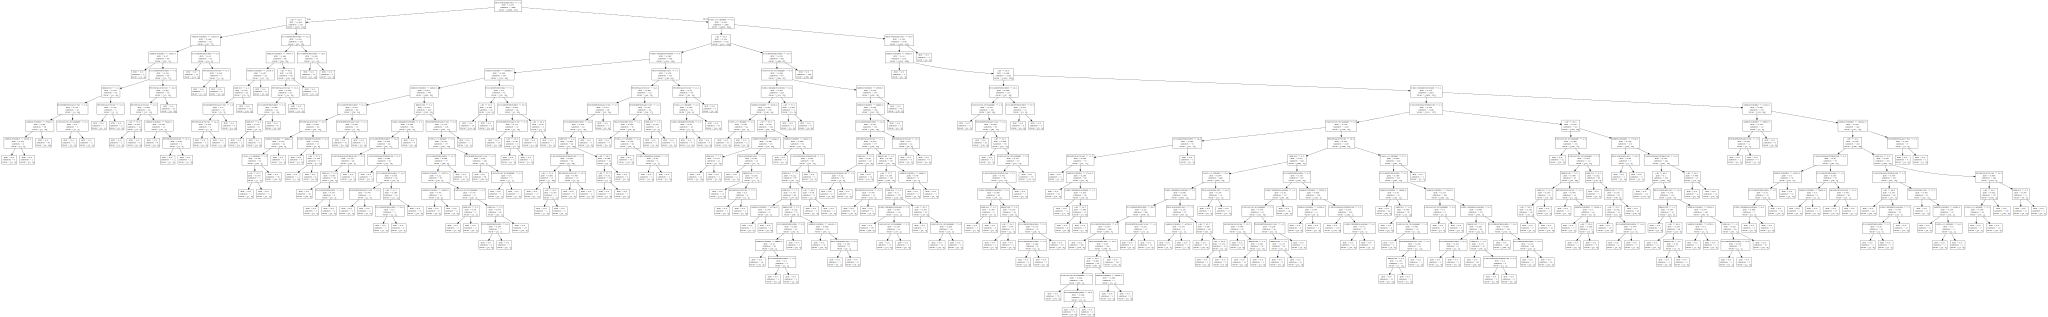

In [22]:
import graphviz
with open("Attrition_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)